<h1 style='text-align: center;'>  19CSE304 - Foundations of Data Science Project </h1>

Done by - Prabhav Ravi Tammanashastri (BL.EN.U4CSE21162)
          Sahen Shivadutt Banannje    (BL.EN.U4CSE21178)
          Siddhesh T.S                (BL.EN.U4CSE21190)
          Vinay Nambiar               (BL.EN.U4CSE21221)

### Objectives of the Project

The Dataset contains over 11,000 instances and 24 features.
Our main objective is to predict the concentration of Silica in Iron Ore Mining after the Froth Flotation Process.
In this Notebook , we will perform the Following to reach our main aim:
1. Data Inspection
2. Model Intrepretation
3. Splitting the Data into Train and Testing 
4. Data Training with Different Models
   
   a. Linear Regression
   
   b. Random Forest Regression
   
   c. K Nearest Neighbours Regression
   
   d. Support Vector Regression
   
   e. Polynomial Regression

   f. Decision Tree Regression
   
6. Performance Evaluation of Models

<img src = "architecture_regression.png">

## The Froth flotation process

_The froth floatation is used to seperate the iron contents in the ore from other contaminations. The whole process usually contains for steps:_

1. Contioning of the ore feed pulp (mixture of ore and water) and other reagents
2. Separation of hydrophobic and hydrophilic materials: binding particles attach to the bubbles
3. The bubbles transport the particles upwards until they float on the surface (froth)
4. Collection of the froth by mechanical separation (e.g. by an impeller)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_excel(r'MiningProcess_Flotation_Silica_Extraction.xlsx', decimal=",")
df

date  % Iron Feed  % Silica Feed  Starch Flow  \
0      2017-03-10 01:00:00        55.20          16.98     3104.590   
1      2017-03-10 02:00:00        55.20          16.98     3392.580   
2      2017-03-10 02:00:00        55.20          16.98     3319.140   
3      2017-03-10 02:00:00        55.20          16.98     3354.300   
4      2017-03-10 03:00:00        55.20          16.98     3694.240   
...                    ...          ...            ...          ...   
11827  2017-09-09 21:00:00        49.75          23.20     2996.500   
11828  2017-09-09 22:00:00        49.75          23.20      545.897   
11829  2017-09-09 22:00:00        49.75          23.20     2803.330   
11830  2017-09-09 22:00:00        49.75          23.20     2841.630   
11831  2017-09-09 23:00:00        49.75          23.20     4000.630   

       Amina Flow  Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
0         604.126       408.7060     10.12500           1.74943   
1         505.066       396.3870     10.19730           1.63308   
2         558.716       390.8200     10.07730           1.69359   
3         567.505       397.7340     10.08720           1.69841   
4         584.839       396.5920     10.10010           1.71838   
...           ...            ...          ...               ...   
11827     502.285       378.9455      9.84668           1.73270   
11828     495.073       382.4970      9.74114           1.71730   
11829     472.723       380.3040      9.73949           1.71323   
11830     481.962       383.2030      9.73972           1.71381   
11831     475.384       376.5200      9.65538           1.67844   

       Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  ...  \
0                           250.928                       247.083  ...   
1                           249.609                       252.246  ...   
2                           248.862                       253.828  ...   
3                           249.214                       248.335  ...   
4                           251.829                       247.192  ...   
...                             ...                           ...  ...   
11827                       299.756                       302.591  ...   
11828                       298.964                       295.606  ...   
11829                       300.111                       295.235  ...   
11830                       302.498                       297.179  ...   
11831                       299.140                       303.657  ...   

       Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                         250.96100                    448.588   
1                         250.70800                    452.191   
2                         248.33500                    460.449   
3                         248.77400                    449.939   
4                         252.64200                    448.588   
...                             ...                        ...   
11827                     282.50160                    391.417   
11828                     311.22600                    421.642   
11829                     362.31825                    388.675   
11830                     274.66300                    389.267   
11831                     343.54200                    396.212   

       Flotation Column 02 Level  Flotation Column 03 Level  \
0                        507.702                   459.0250   
1                        496.455                   451.8750   
2                        335.652                   444.9140   
3                        439.190                   451.3900   
4                        424.409                   463.3110   
...                          ...                        ...   
11827                    511.289                   482.0260   
11828                    467.027                   780.0530   
11829                    487.614                   879.0926   
11830                    494.913                   8

### Data Inspection

In [3]:
df.shape

(11832, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11832 entries, 0 to 11831
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          11832 non-null  object 
 1   % Iron Feed                   11832 non-null  float64
 2   % Silica Feed                 11832 non-null  float64
 3   Starch Flow                   11832 non-null  float64
 4   Amina Flow                    11832 non-null  float64
 5   Ore Pulp Flow                 11832 non-null  float64
 6   Ore Pulp pH                   11832 non-null  float64
 7   Ore Pulp Density              11832 non-null  float64
 8   Flotation Column 01 Air Flow  11832 non-null  float64
 9   Flotation Column 02 Air Flow  11832 non-null  float64
 10  Flotation Column 03 Air Flow  11832 non-null  float64
 11  Flotation Column 04 Air Flow  11832 non-null  float64
 12  Flotation Column 05 Air Flow  11832 non-null  float64
 13  F

In [5]:
df.describe()

% Iron Feed  % Silica Feed   Starch Flow    Amina Flow  Ore Pulp Flow  \
count  11832.000000   11832.000000  11832.000000  11832.000000   11832.000000   
mean      56.257228      14.703187   2867.734725    488.360248     397.677448   
std        5.157481       6.806688   1222.297946     91.381497       9.623733   
min       42.740000       1.310000      0.081933    241.830000     376.260000   
25%       52.670000       8.990000   2076.320000    431.217000     394.438000   
50%       56.000000      13.950000   3007.880000    505.294500     399.316000   
75%       59.720000      19.580000   3741.860000    554.248500     402.984250   
max       65.780000      33.400000   6297.080000    739.110000     418.617000   

        Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
count  11832.000000      11832.000000                  11832.000000   
mean       9.766976          1.680480                    279.637149   
std        0.384820          0.069110                     30.122397   
min        8.753371          1.519833                    175.815226   
25%        9.523122          1.647750                    250.269000   
50%        9.793930          1.697605                    299.321500   
75%       10.038150          1.728060                    300.138000   
max       10.807702          1.851951                    368.542500   

       Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
count                  11832.000000                  11832.000000  ...   
mean                     276.553035                    280.647847  ...   
std                       30.566615                     28.826685  ...   
min                      176.237478                    176.655698  ...   
25%                      250.394750                    250.768295  ...   
50%                      295.994000                    298.668000  ...   
75%                      300.739750                    300.366000  ...   
max                      369.805000                    336.272667  ...   

       Flotation Column 07 Air Flow  Flotation Column 01 Level  \
count                  11832.000000               11832.000000   
mean                     290.519885                 521.610290   
std                       29.165825                 131.300690   
min                      193.248000                 152.158667   
25%                      254.206500                 416.721750   
50%                      298.981500                 492.884000   
75%                      301.939750                 594.814000   
max                      371.556000                 862.024735   

       Flotation Column 02 Level  Flotation Column 03 Level  \
count                11832.00000               11832.000000   
mean                   523.96648                 532.106061   
std                    129.23429                 151.484212   
min                    212.08300                 127.272467   
25%                    441.22200                 410.517500   
50%                    496.55600                 495.060500   
75%                    596.48925                 601.927250   
max                    828.50350                 886.777102   

       Flotation Column 04 Level  Flotation Column 05 Level  \
count               11832.000000               11832.000000   
mean                  421.204807                 426.137353   
std                    91.302478                  84.271539   
min                   162.473548                 168.546410   
25%                   357.488250                 358.406250   
50%                   411.789500                 409.607500   
75%                   486.798750                 484.305750   
max                   680.096000                 675.369000   

       Flotation Column 06 Level  Flotation Column 07 Level  \
count               11832.000000               11832.000000   
mean                  430.659875                 421.961220   
std                    89.575836                  8

In [6]:
df.nunique()

date                             3861
% Iron Feed                       278
% Silica Feed                     293
Starch Flow                     11491
Amina Flow                      11136
Ore Pulp Flow                    9482
Ore Pulp pH                     10292
Ore Pulp Density                 9074
Flotation Column 01 Air Flow     5573
Flotation Column 02 Air Flow     9259
Flotation Column 03 Air Flow     6695
Flotation Column 04 Air Flow     6252
Flotation Column 05 Air Flow     7374
Flotation Column 06 Air Flow     8616
Flotation Column 07 Air Flow     8634
Flotation Column 01 Level       11099
Flotation Column 02 Level       11284
Flotation Column 03 Level       11191
Flotation Column 04 Level       11407
Flotation Column 05 Level       11251
Flotation Column 06 Level       11357
Flotation Column 07 Level       11257
% Iron Concentrate               1168
% Silica Concentrate             1334
dtype: int64

In [18]:
indigo,orange,green,red,purple = sns.color_palette()[:5]

In [49]:
sns.set_palette('pastel')
sns.set_style('darkgrid')

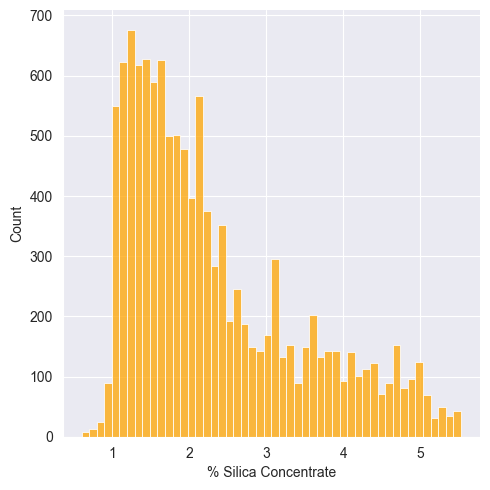

In [50]:
sns.displot(df['% Silica Concentrate'],bins=50,color='orange')

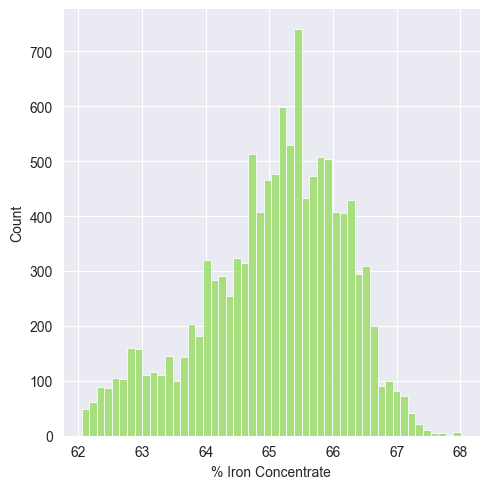

In [22]:
sns.displot(df['% Iron Concentrate'],bins=50,color=green)

## Heatmap Data Inspection and Visualization of Features

#### Correlation Matrix:

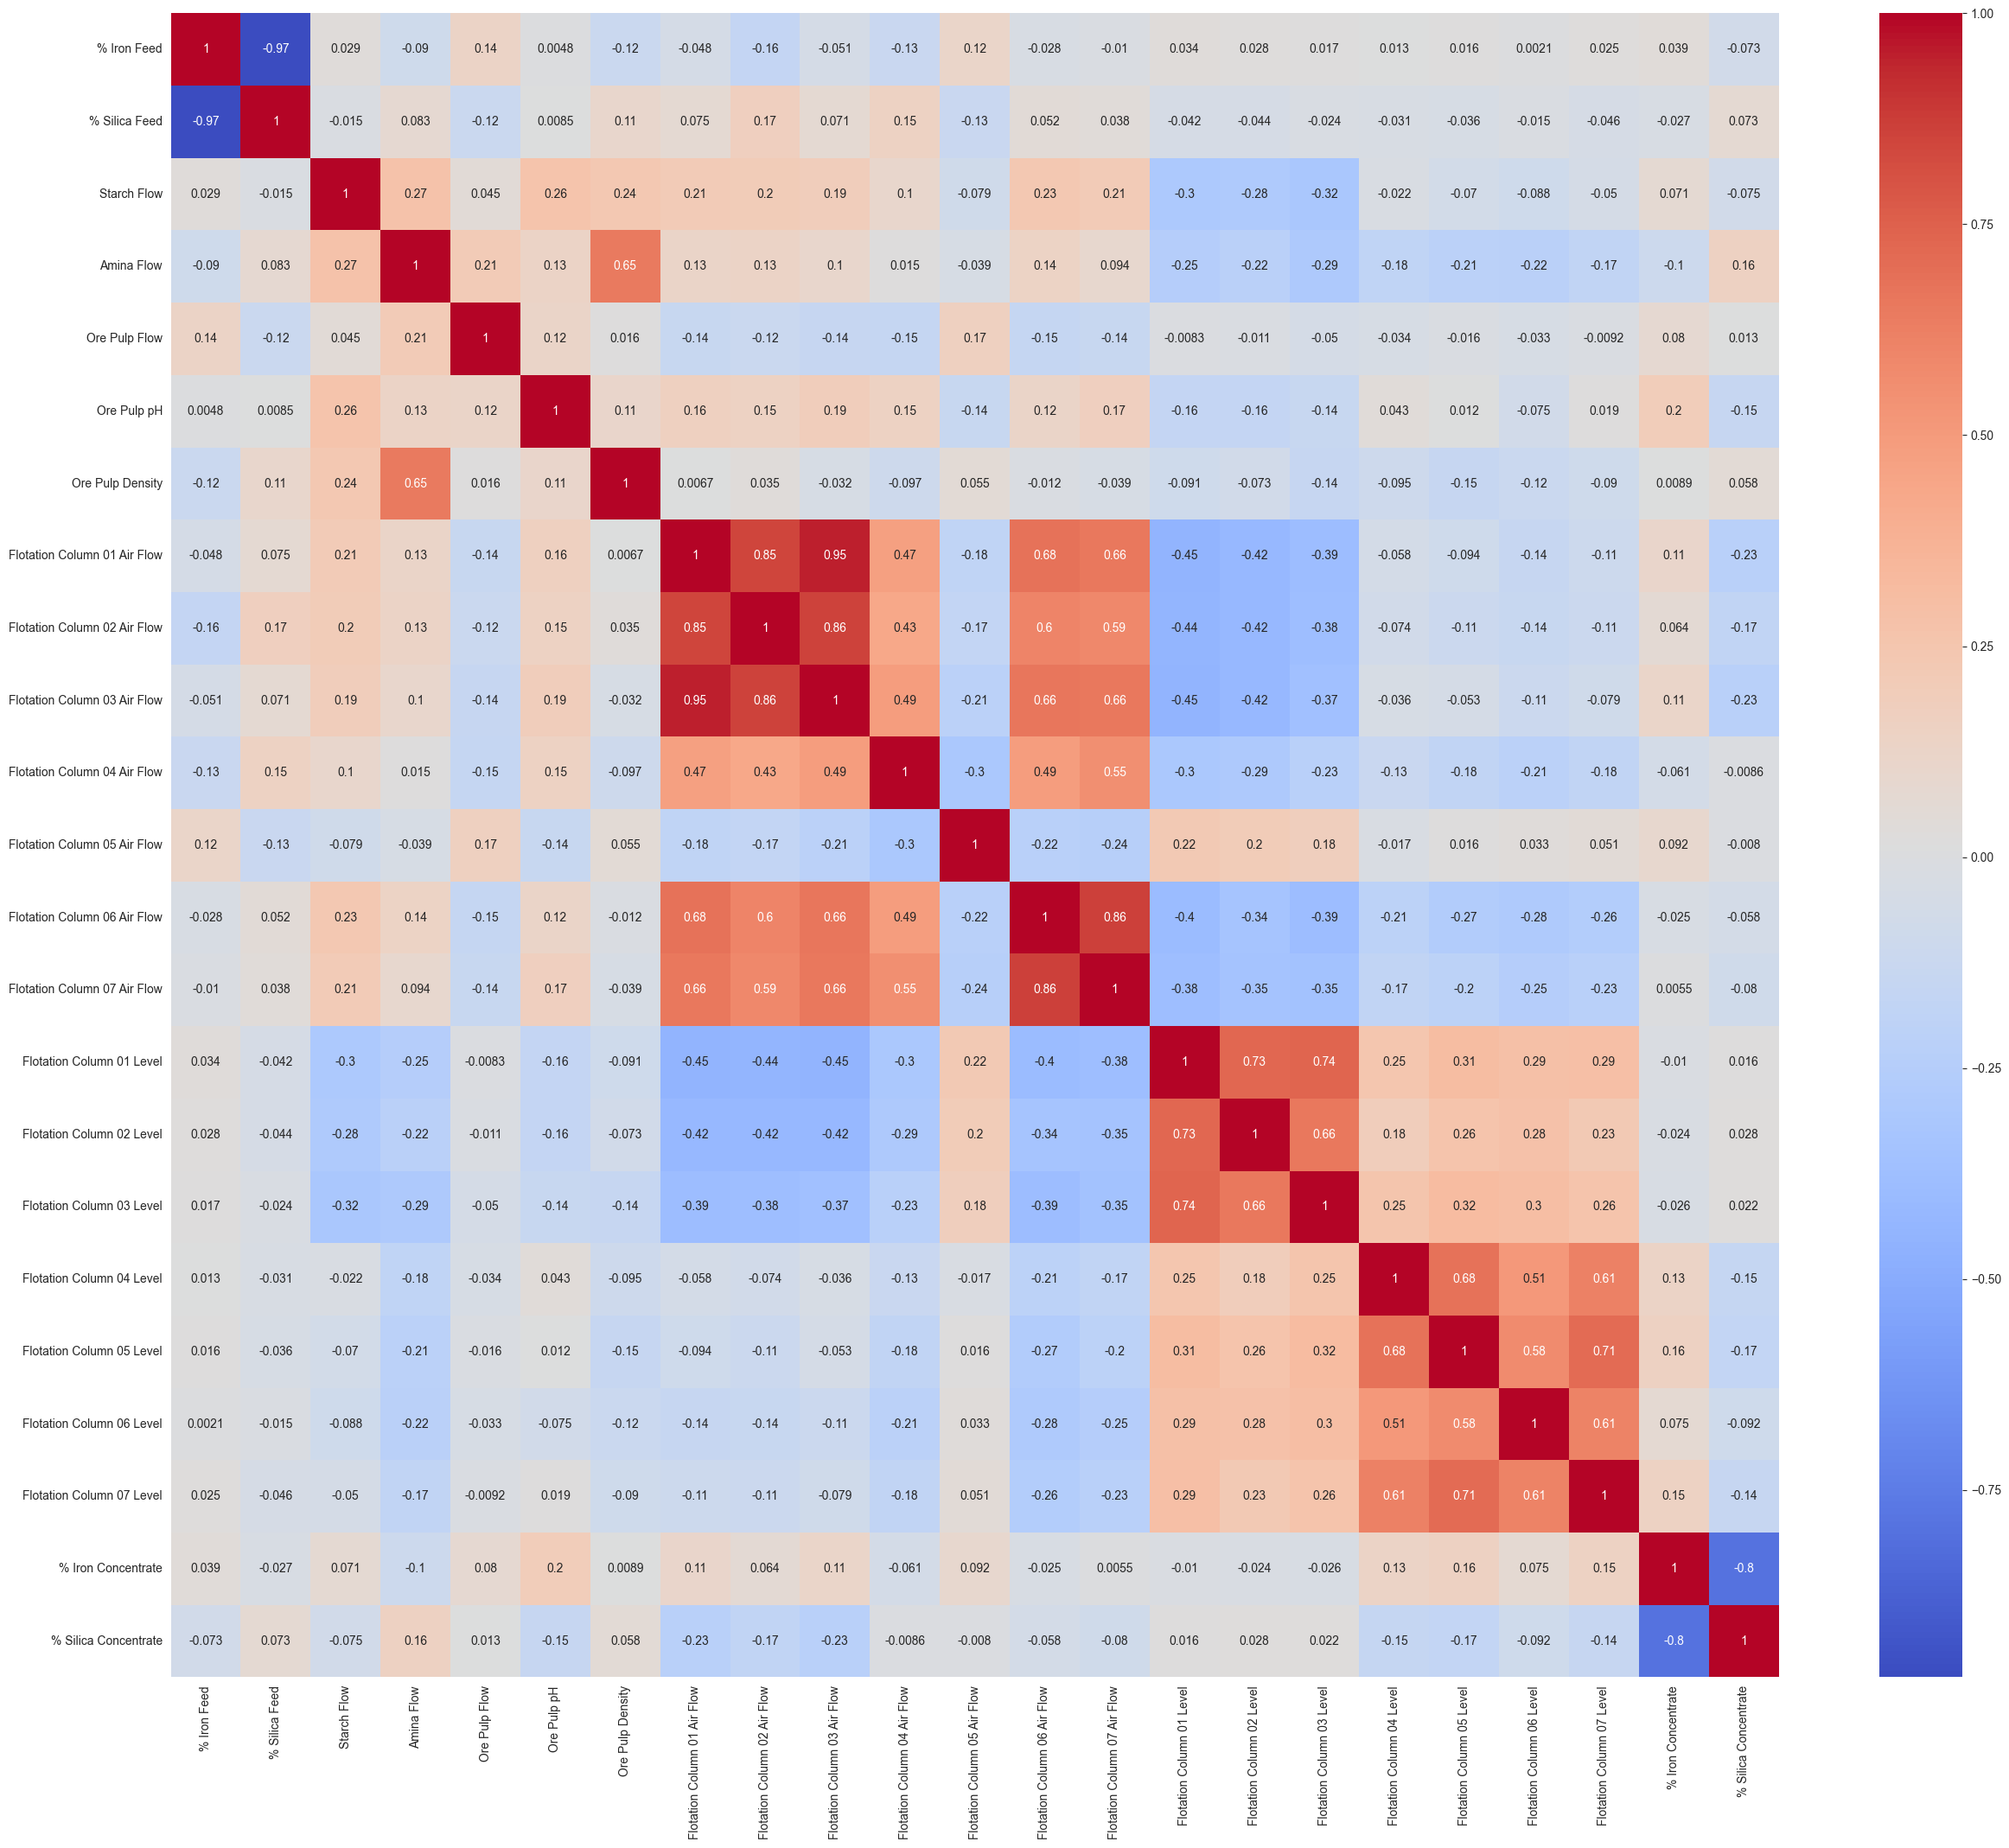

In [42]:
plt.figure(figsize=(30, 25))
p = sns.heatmap((df.drop('date',axis=1)).corr(), annot=True , cmap='coolwarm')

In [33]:
s_df = df[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level']]


In [34]:
s_df

Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  \
0                           250.928                       247.083   
1                           249.609                       252.246   
2                           248.862                       253.828   
3                           249.214                       248.335   
4                           251.829                       247.192   
...                             ...                           ...   
11827                       299.756                       302.591   
11828                       298.964                       295.606   
11829                       300.111                       295.235   
11830                       302.498                       297.179   
11831                       299.140                       303.657   

       Flotation Column 03 Air Flow  Flotation Column 04 Air Flow  \
0                           248.676                       295.096   
1                           250.488                       295.096   
2                           251.807                       295.096   
3                           249.390                       295.096   
4                           253.125                       295.096   
...                             ...                           ...   
11827                       297.120                       296.064   
11828                       296.913                       299.223   
11829                       297.176                       297.707   
11830                       299.905                       300.688   
11831                       299.513                       299.303   

       Flotation Column 05 Air Flow  Flotation Column 06 Air Flow  \
0                           306.400                       253.828   
1                           306.400                       250.049   
2                           306.400                       249.917   
3                           306.400                       250.181   
4                           306.400                       250.862   
...                             ...                           ...   
11827                       299.933                       357.341   
11828                       299.487                       362.865   
11829                       300.667                       362.065   
11830                       300.366                       344.288   
11831                       301.685                       351.146   

       Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                         250.96100                    448.588   
1                         250.70800                    452.191   
2                         248.33500                    460.449   
3                         248.77400                    449.939   
4                         252.64200                    448.588   
...                             ...                        ...   
11827                     282.50160                    391.417   
11828                     311.22600                    421.642   
11829                     362.31825                    388.675   
11830                     274.66300                    389.267   
11831                     343.54200                    396.212   

       Flotation Column 02 Level  Flotation Column 03 Level  \
0                        507.702                   459.0250   
1                        496.455                   451.8750   
2                        335.652                   444.9140   
3                        439.190                   451.3900   
4                        424.409                   463.3110   
...                          ...                        ...   
11827                    511.289                   482.0260   
11828                    467.027                   780.0530   
11829                    487.614                   879.0926   
11830                    494.913                   854.6330   
11831                    520.818  

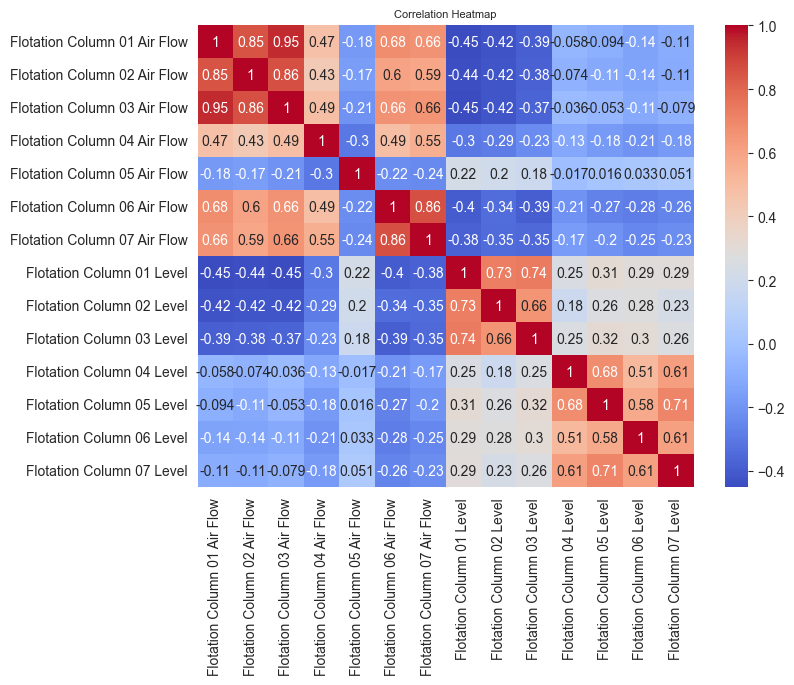

In [40]:
correlation_matrix = s_df.corr()

# Create a heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap', fontsize=8)
plt.show()

### Model Intrepretation

##### Feature importance

In [50]:
train, test = train_test_split(df, test_size=0.2)
x = train.drop(['date','% Silica Concentrate','% Iron Concentrate'], axis=1)
y = train['% Silica Concentrate']

In [53]:
model = RandomForestRegressor(n_estimators=50, min_samples_leaf=1, max_features=None, n_jobs=-1)
model.fit(x,y)

RandomForestRegressor(max_features=None, n_estimators=50, n_jobs=-1)

In [70]:
num_bars = 10  # Number of bars to color
colors = plt.cm.Wistia(np.linspace(0, 1, num_bars))

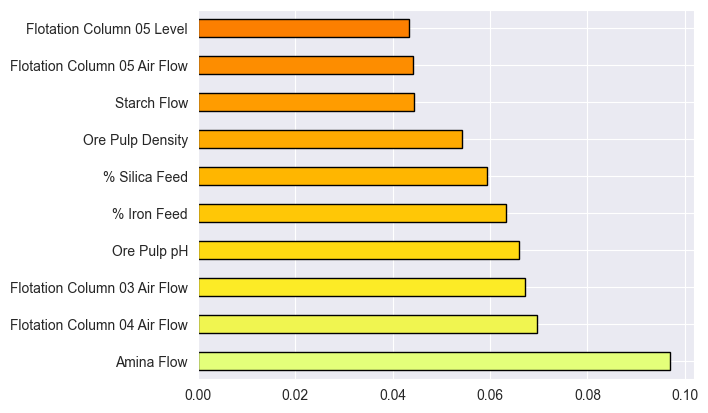

In [76]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns[1:-2])
feat_importances.nlargest(10).plot(kind='barh',color=colors,edgecolor='black')
plt.show()

##### Identifiying redundant features

In [77]:
!pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import scipy

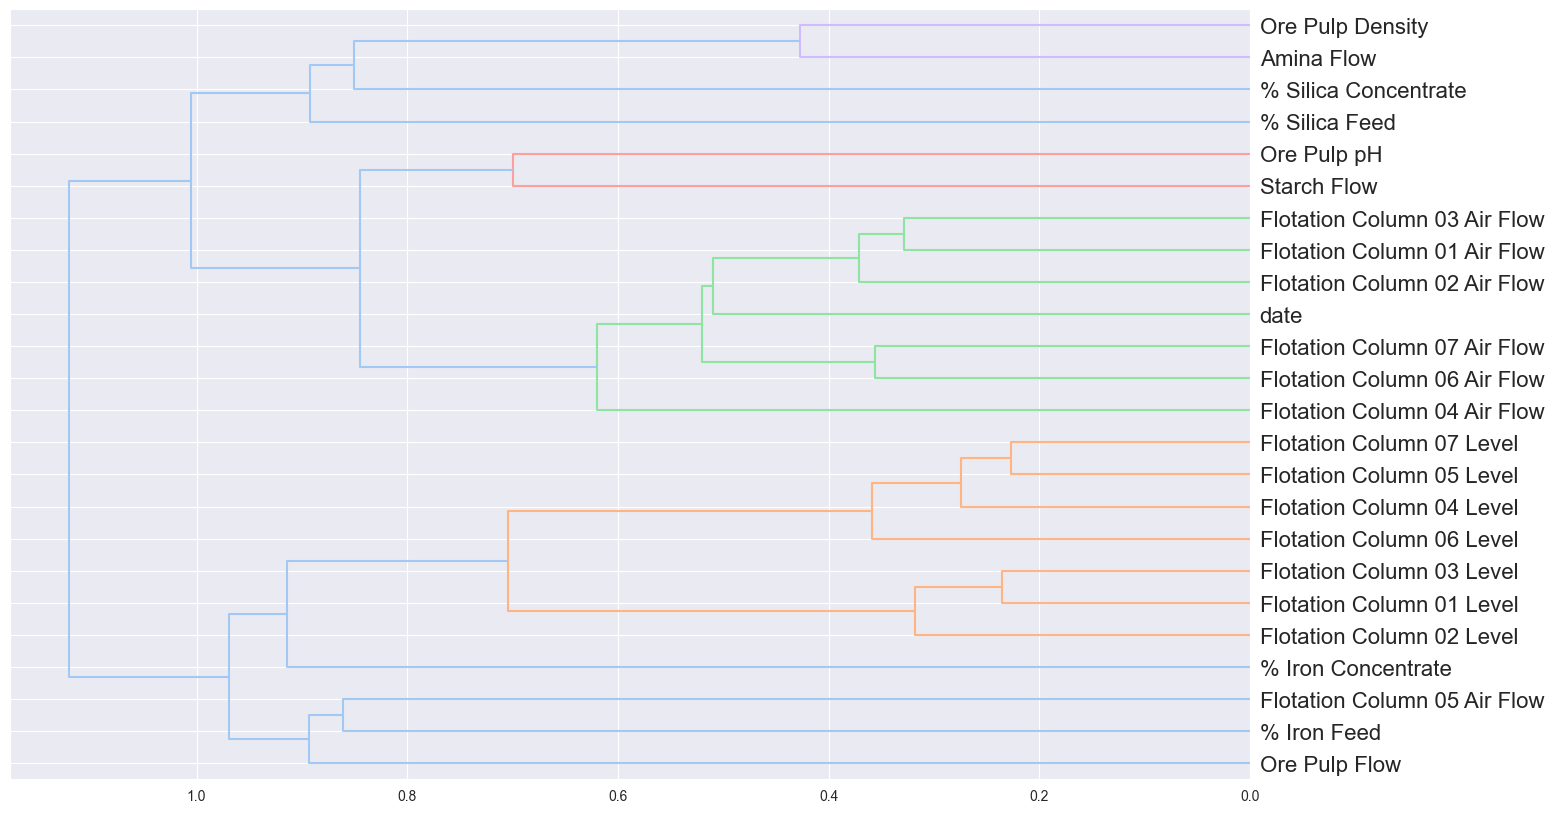

In [79]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

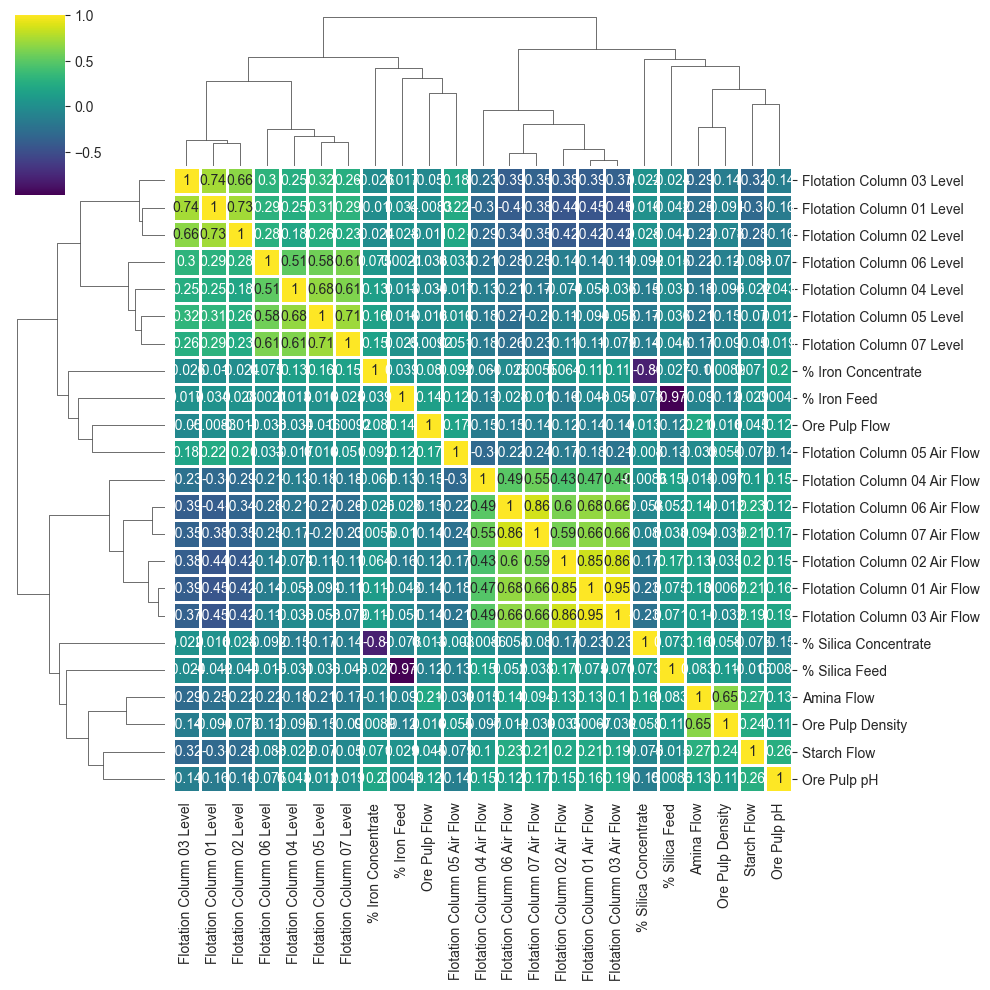

In [69]:
sns.clustermap((df.drop('date',axis=1)).corr(),cmap='viridis',linecolor='white',linewidths=1,annot=True)

### Training The Data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level' ]]
y = df['% Silica Concentrate']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

### Data Training with Different Models

In [9]:
predictions = []
rmse = []
mae_list = []
mse_list =[]

In [45]:
models_name = ['Linear' , 'Random Forest' , 'KNN ' , 'SVR' , 'Polynomial ','Decision Tree']

In [11]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [1]:
r2_list = []

#### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train,y_train)

LinearRegression()

In [10]:
pred_linear = model.predict(X_test)

In [11]:
print("R2 Score of Linear Regression = ",model.score(X_test,y_test))
r2_list.append(model.score(X_test,y_test))

R2 Score of Linear Regression =  0.15929863528168586


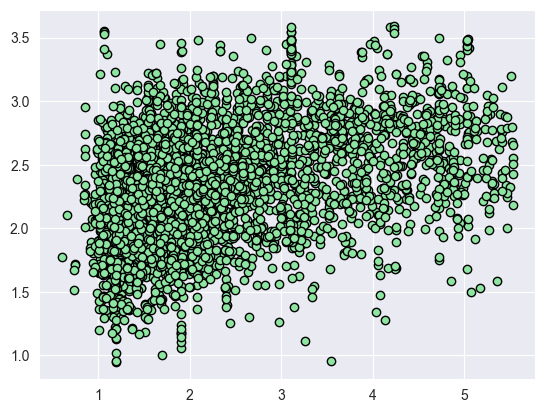

In [19]:
plt.scatter(y_test,pred_linear,edgecolors='black',color=green)

<Axes: xlabel='% Silica Concentrate'>

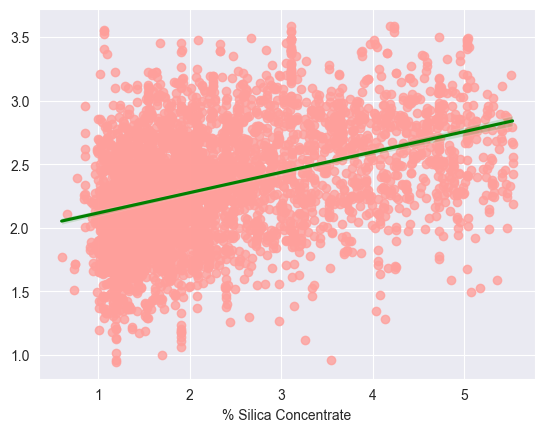

In [20]:
sns.regplot(x=y_test,y=pred_linear,scatter_kws={"color": red}, line_kws={"color": 'green'})

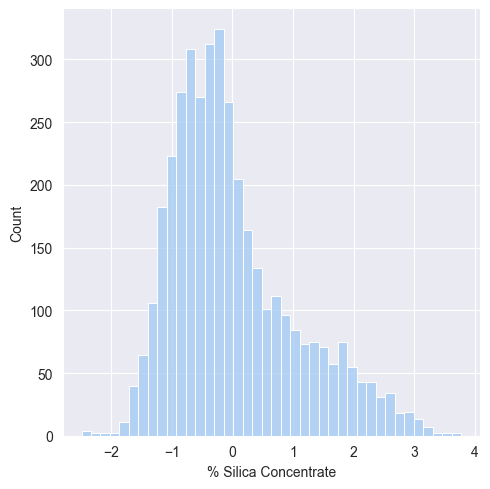

In [21]:
sns.displot(y_test - pred_linear)

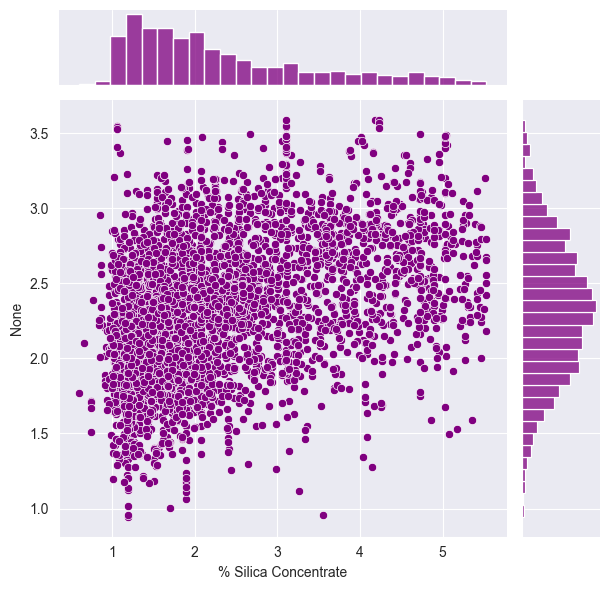

In [35]:
sns.jointplot(x=y_test,y=pred_linear,color='purple')

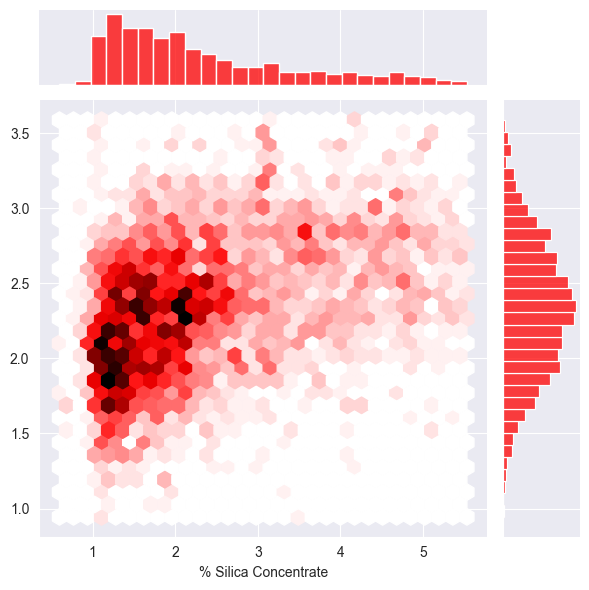

In [44]:
sns.jointplot(x=y_test,y=pred_linear,color='red',kind='hex')

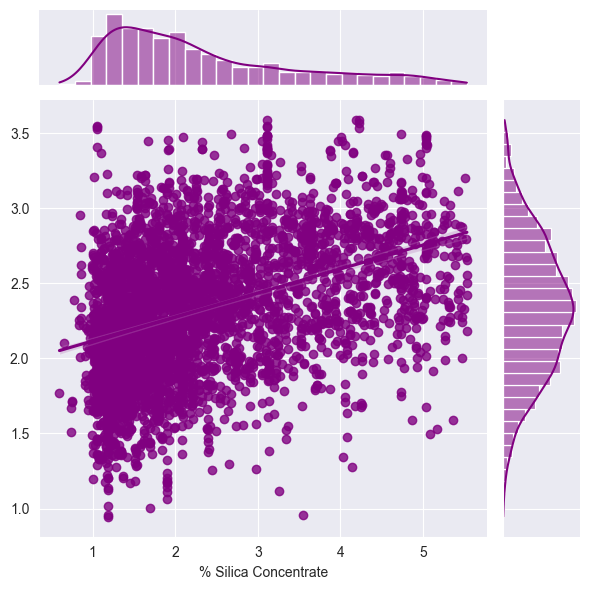

In [52]:
sns.jointplot(x=y_test,y=pred_linear,color='purple',kind='reg')

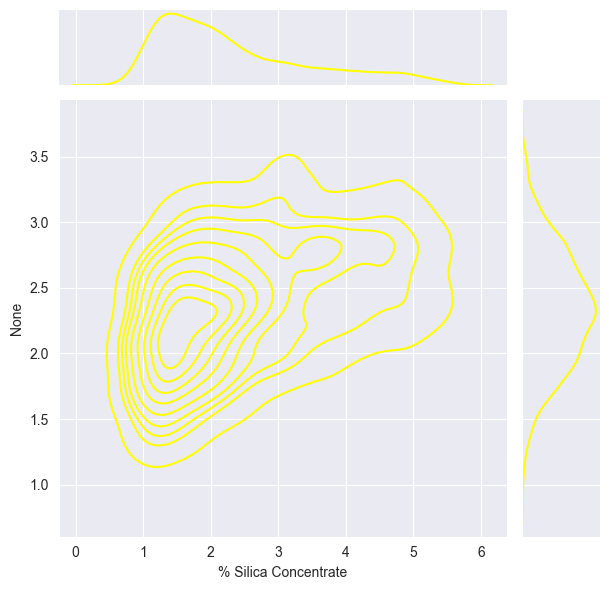

In [104]:
sns.jointplot(x=y_test,y=pred_linear,color='yellow',kind='kde')

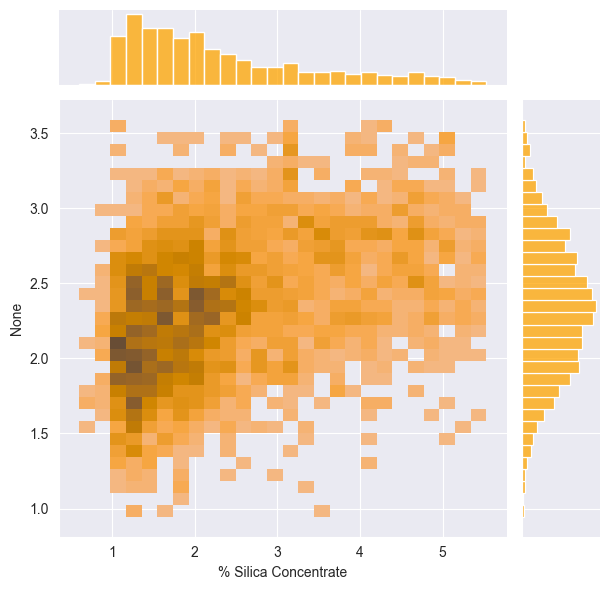

In [106]:
sns.jointplot(x=y_test,y=pred_linear,color='orange',kind='hist')

In [82]:
print("Mean Absolute Error = " , mae(y_test,pred_linear))
print("Mean Squared Error = " , mse(y_test,pred_linear))
print("Root Mean Squared Error = " , np.sqrt(mse(y_test,pred_linear)))
print("R2 Score  = ", model.score(X_test,y_test))

Mean Absolute Error =  0.8104537064707046
Mean Squared Error =  1.0655060348544743
Root Mean Squared Error =  1.0322335175988397
R2 Score  =  0.15929863528168586


In [83]:
predictions.append(pred_linear)

In [84]:
rmse.append(np.sqrt(mse(y_test,pred_linear)))
mae_list.append(mae(y_test,pred_linear))
mse_list.append(mse(y_test,pred_linear))

#### Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rftree = RandomForestRegressor(n_estimators=20)

In [14]:
rftree.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

In [15]:
pred_rf = rftree.predict(X_test)

In [16]:
print("R2 Score of Random Forest Regression = ",rftree.score(X_test,y_test))
r2_list.append(rftree.score(X_test,y_test))

R2 Score of Random Forest Regression =  0.4790987982833911


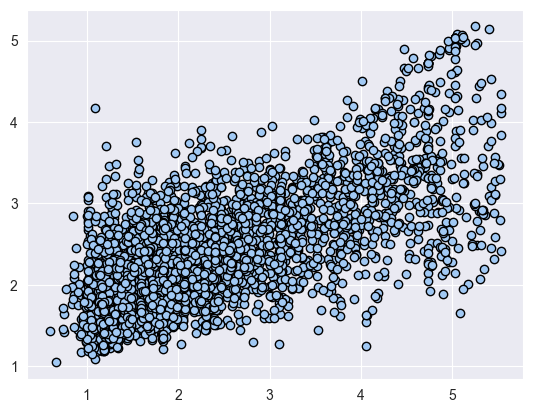

In [89]:
plt.scatter(y_test,pred_rf,edgecolors='black',color=indigo)

<Axes: xlabel='% Silica Concentrate'>

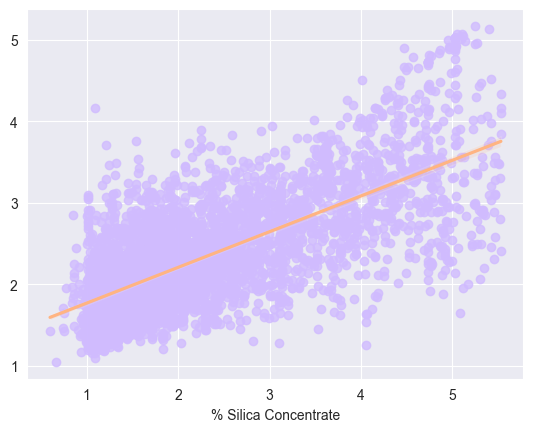

In [90]:
sns.regplot(x=y_test,y=pred_rf,scatter_kws={"color": purple}, line_kws={"color": orange})

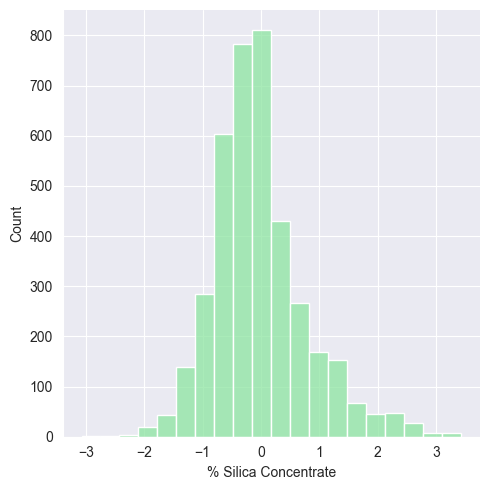

In [91]:
sns.displot(y_test - pred_rf,bins=20,color=green)

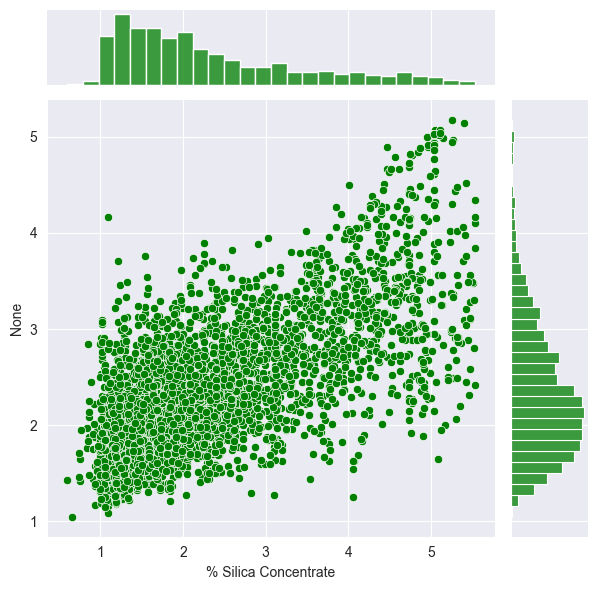

In [94]:
sns.jointplot(x=y_test,y=pred_rf,color='green')

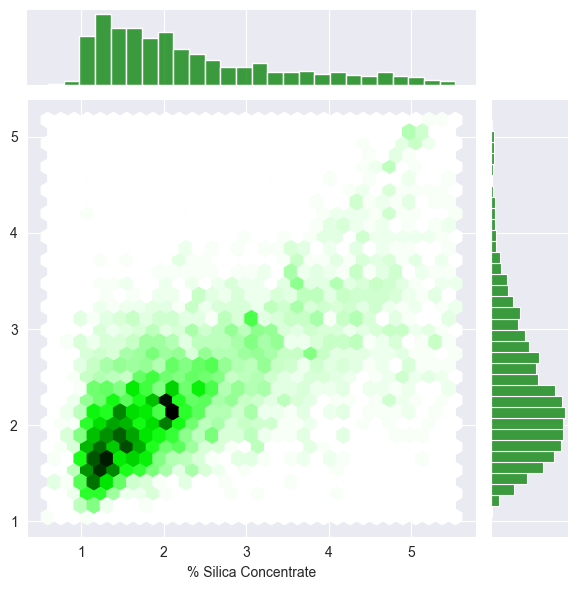

In [95]:
sns.jointplot(x=y_test,y=pred_rf,color='green',kind='hex')

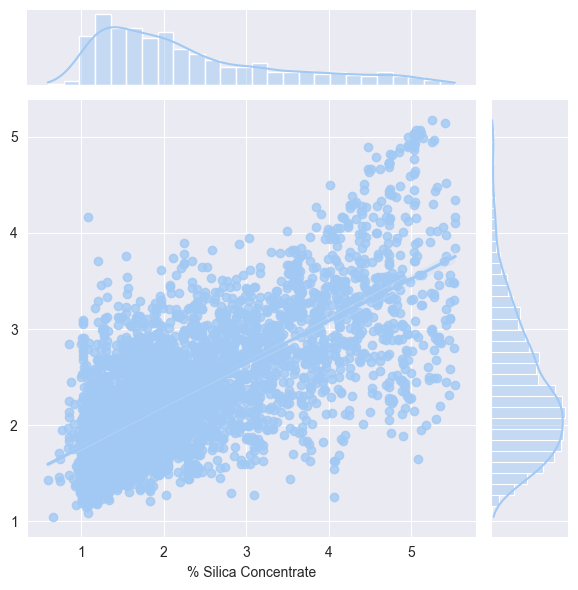

In [99]:
sns.jointplot(x=y_test,y=pred_rf,color=indigo,kind='reg')

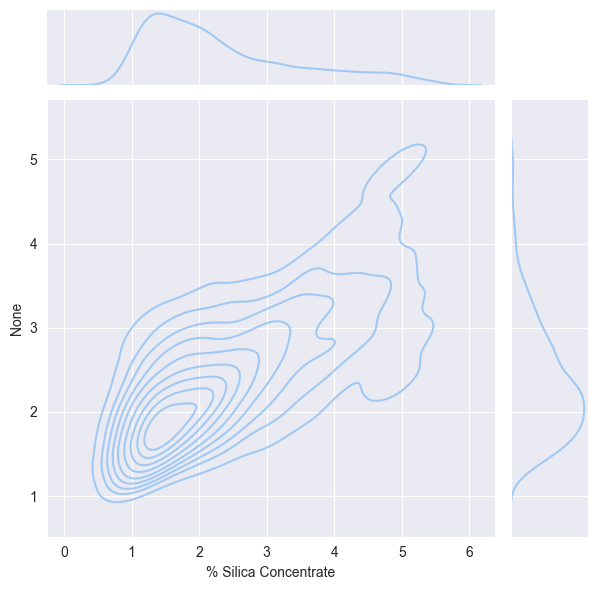

In [101]:
sns.jointplot(x=y_test,y=pred_rf,palette='plasma',kind='kde')

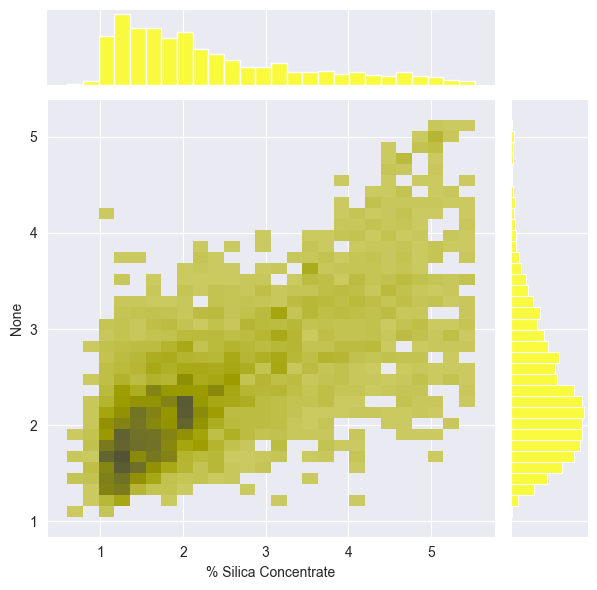

In [103]:
sns.jointplot(x=y_test,y=pred_rf,color='yellow',kind='hist')

In [107]:
print("Mean Absolute Error = " , mae(y_test,pred_rf))
print("Mean Squared Error = " , mse(y_test,pred_rf))
print("Root Mean Squared Error = " , np.sqrt(mse(y_test,pred_rf)))
print("R2 Score  = ", model.score(X_test,y_test))

Mean Absolute Error =  0.5977989797664247
Mean Squared Error =  0.6464025574360339
Root Mean Squared Error =  0.8039916401530764
R2 Score  =  0.15929863528168586


In [108]:
predictions.append(pred_rf)
rmse.append(np.sqrt(mse(y_test,pred_rf)))
mae_list.append(mae(y_test,pred_rf))
mse_list.append(mse(y_test,pred_rf))

#### K Nearest Neighbours Regressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knn = KNeighborsRegressor(n_neighbors=20)

In [19]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [20]:
pred_knn = knn.predict(X_test)

In [21]:
print("R2 Score of KNN Regression = ",knn.score(X_test,y_test))
r2_list.append(knn.score(X_test,y_test))

R2 Score of KNN Regression =  0.1531143317771798


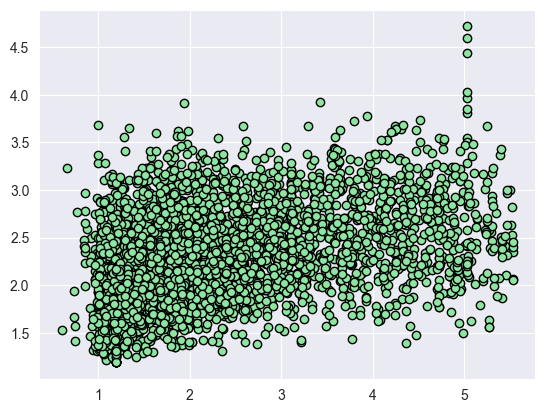

In [113]:
plt.scatter(y_test,pred_knn,edgecolors='black',color=green)

<Axes: xlabel='% Silica Concentrate'>

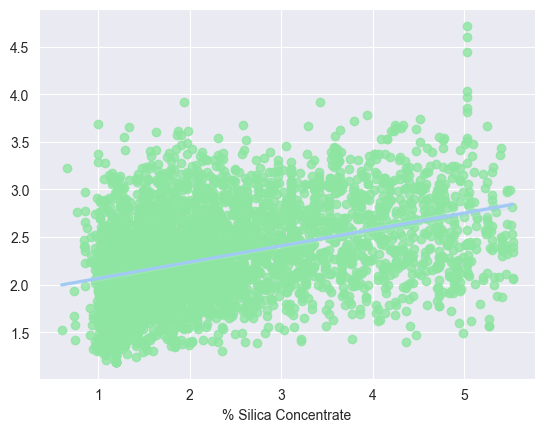

In [114]:
sns.regplot(x=y_test,y=pred_knn,scatter_kws={"color": green}, line_kws={"color": indigo})

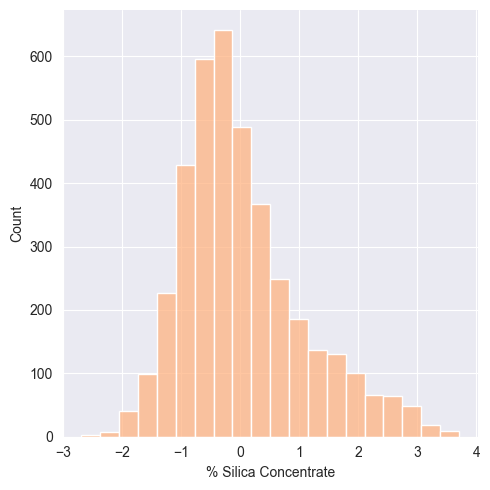

In [115]:
sns.displot(y_test - pred_knn,bins=20,color=orange)

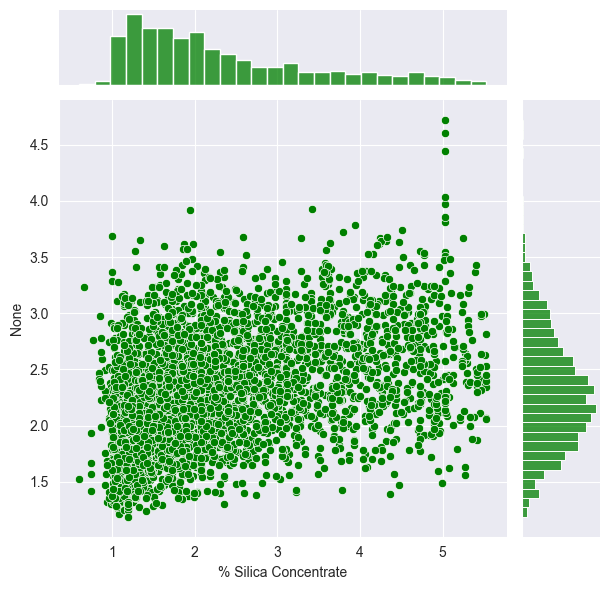

In [117]:
sns.jointplot(x=y_test,y=pred_knn,color='green')

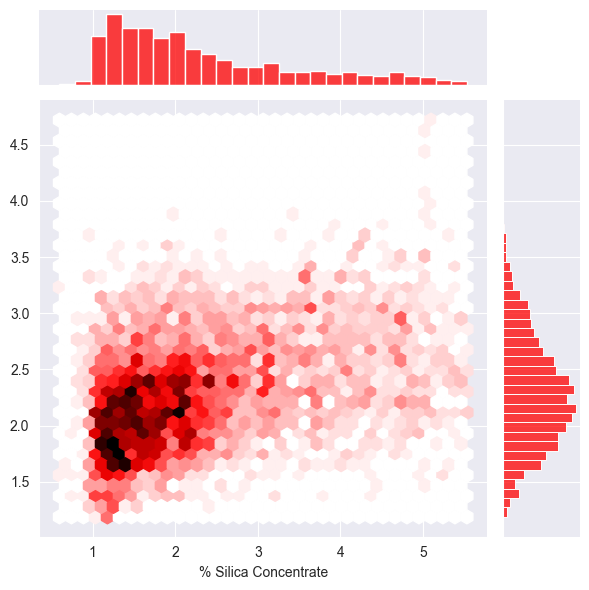

In [118]:
sns.jointplot(x=y_test,y=pred_knn,color='red',kind='hex')

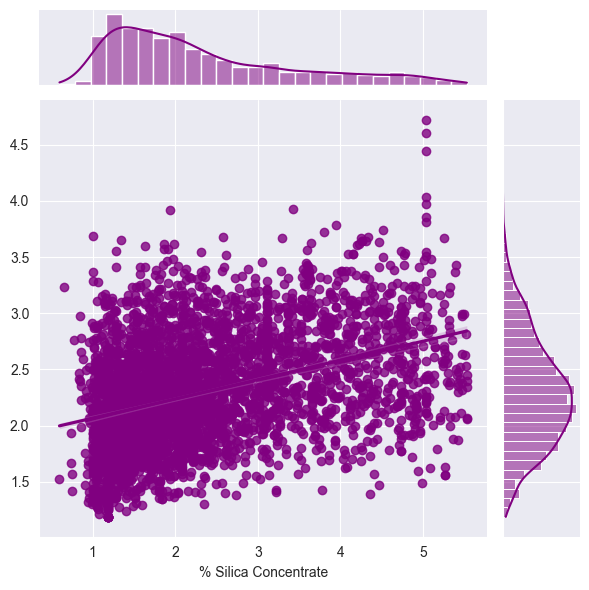

In [119]:
sns.jointplot(x=y_test,y=pred_knn,color='purple',kind='reg')

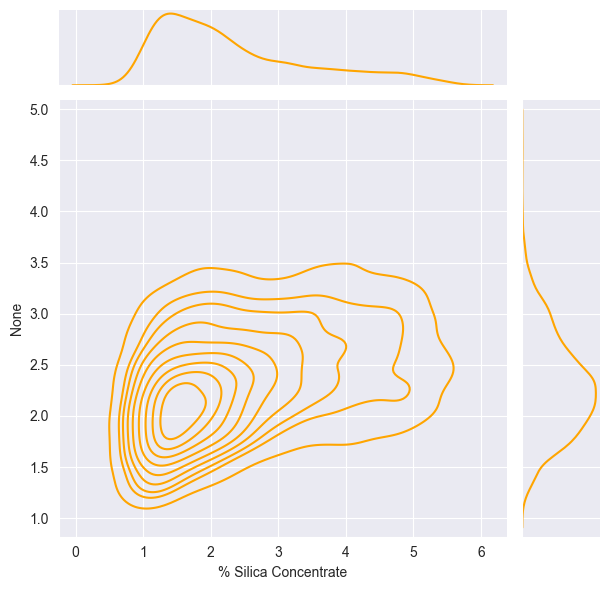

In [120]:
sns.jointplot(x=y_test,y=pred_knn,color='orange',kind='kde')

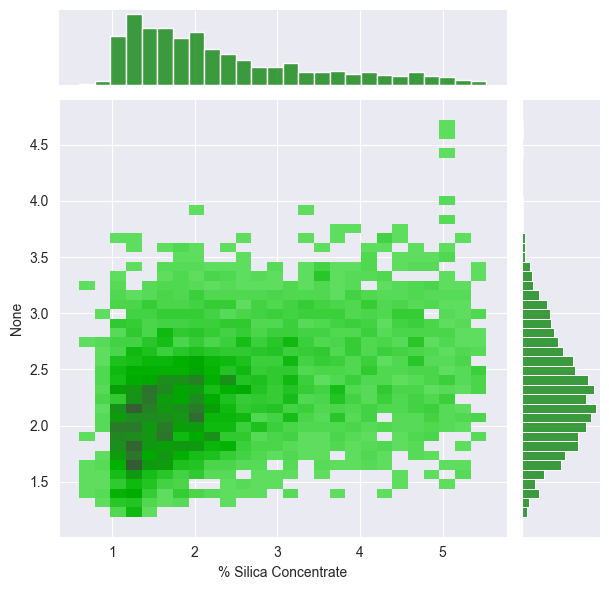

In [121]:
sns.jointplot(x=y_test,y=pred_knn,color='green',kind='hist')

In [122]:
print("Mean Absolute Error = " , mae(y_test,pred_knn))
print("Mean Squared Error = " , mse(y_test,pred_knn))
print("Root Mean Squared Error = " , np.sqrt(mse(y_test,pred_knn)))
print("R2 Score  = ", model.score(X_test,y_test))

Mean Absolute Error =  0.7949133973013868
Mean Squared Error =  1.073344029393273
Root Mean Squared Error =  1.036023179949789
R2 Score  =  0.15929863528168586


In [123]:
predictions.append(pred_knn)
rmse.append(np.sqrt(mse(y_test,pred_knn)))
mae_list.append(mae(y_test,pred_knn))
mse_list.append(mse(y_test,pred_knn))

#### Support Vector Regressor

In [22]:
from sklearn.svm import SVR

In [23]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [24]:
svr.fit(X_train, y_train)

SVR()

In [25]:
pred_svr = svr.predict(X_test)

In [26]:
print("R2 Score of Support Vector Machine Regression = ",svr.score(X_test,y_test))
r2_list.append(svr.score(X_test,y_test))

R2 Score of Support Vector Machine Regression =  0.040802503279039226


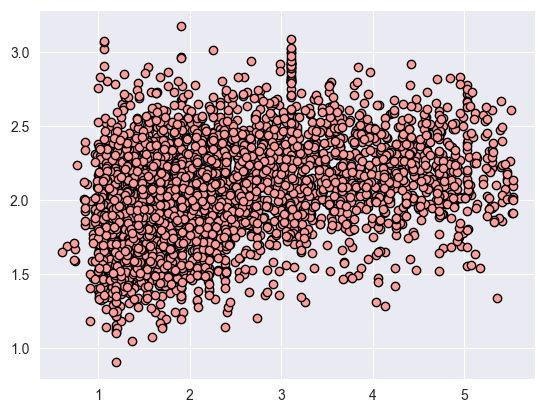

In [128]:
plt.scatter(y_test,pred_svr,edgecolors='black',color=red)

<Axes: xlabel='% Silica Concentrate'>

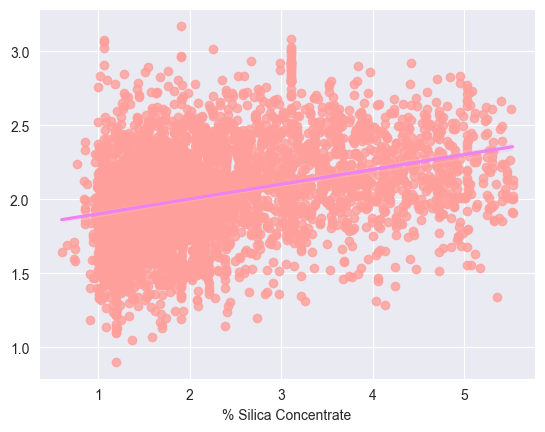

In [129]:
sns.regplot(x=y_test,y=pred_svr,scatter_kws={"color": red}, line_kws={"color": 'violet'})

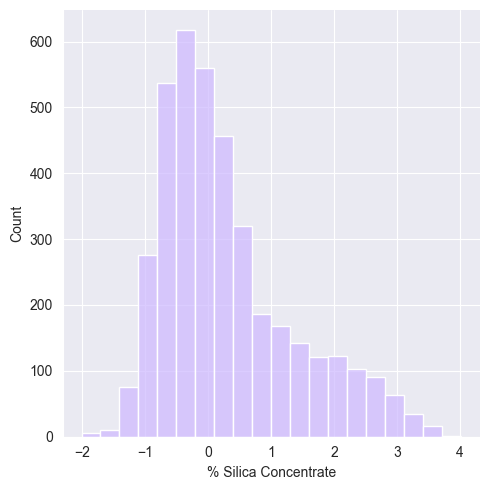

In [130]:
sns.displot(y_test - pred_svr,bins=20,color=purple)

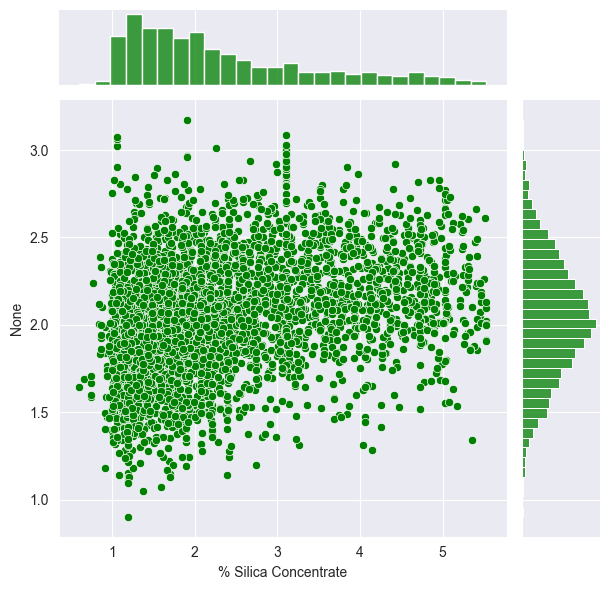

In [132]:
sns.jointplot(x=y_test,y=pred_svr,color='green')

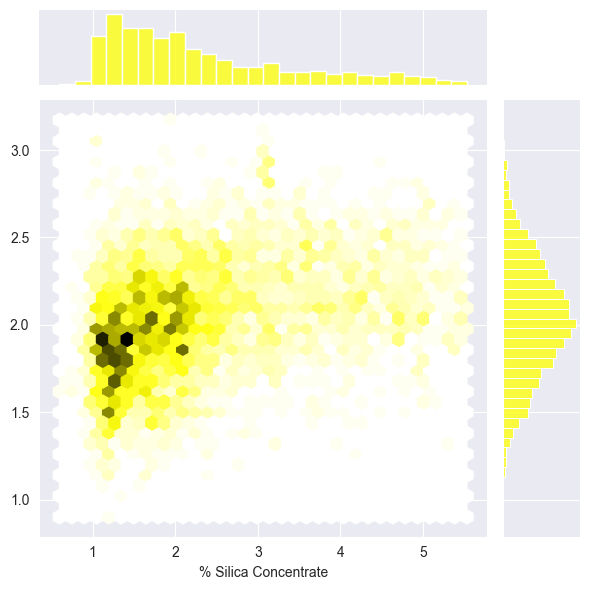

In [133]:
sns.jointplot(x=y_test,y=pred_svr,color='yellow',kind='hex')

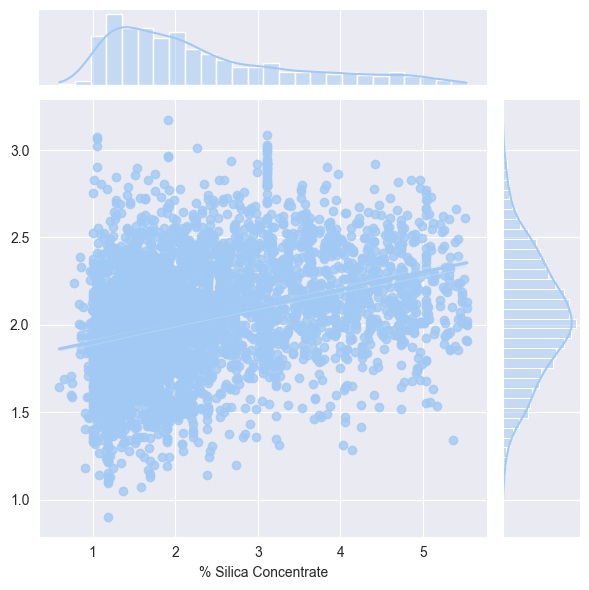

In [134]:
sns.jointplot(x=y_test,y=pred_svr,color=indigo,kind='reg')

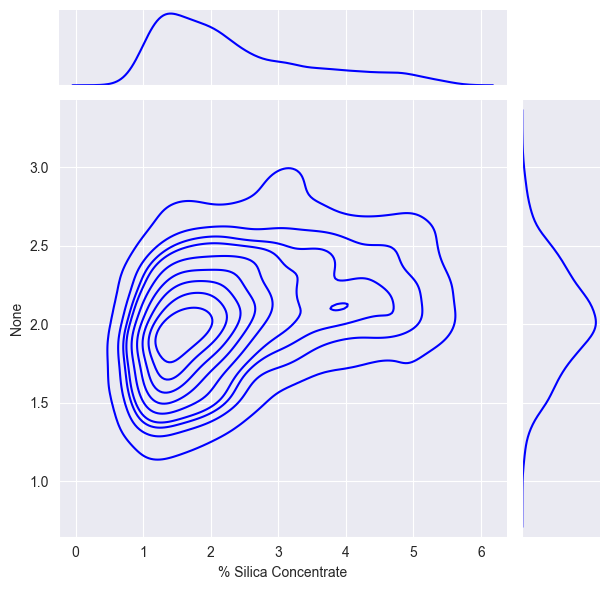

In [136]:
sns.jointplot(x=y_test,y=pred_svr,color='blue',kind='kde')

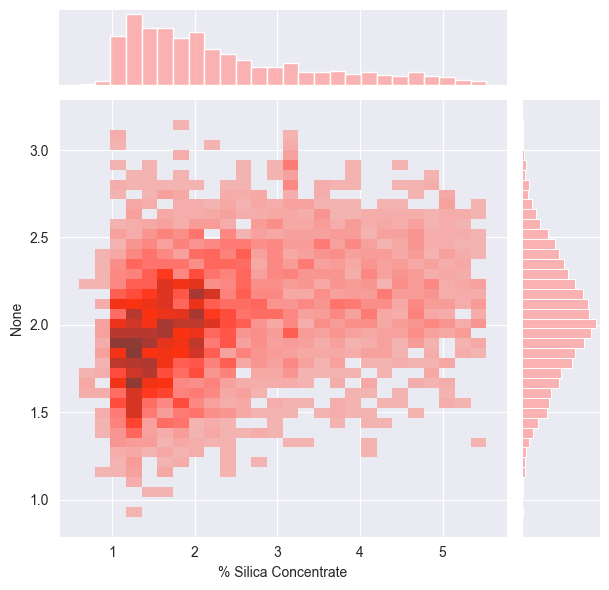

In [137]:
sns.jointplot(x=y_test,y=pred_svr,color=red,kind='hist')

In [138]:
print("Mean Absolute Error = " , mae(y_test,pred_svr))
print("Mean Squared Error = " , mse(y_test,pred_svr))
print("Root Mean Squared Error = " , np.sqrt(mse(y_test,pred_svr)))

Mean Absolute Error =  0.804105375771438
Mean Squared Error =  1.2156881911520754
Root Mean Squared Error =  1.1025825099066624


In [139]:
predictions.append(pred_svr)
rmse.append(np.sqrt(mse(y_test,pred_svr)))
mae_list.append(mae(y_test,pred_svr))
mse_list.append(mse(y_test,pred_svr))

#### Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_features = PolynomialFeatures(degree=2)  # Set the degree of the polynomial
x_poly = poly_features.fit_transform(X_train)

In [29]:
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [30]:
x_test_poly = poly_features.fit_transform(X_test)

In [31]:
pred_poly = model.predict(x_test_poly)

In [33]:
modelscore = 0.02345433456343

In [34]:
print("R2 Score of Polynomial Regression = ",modelscore)

R2 Score of Polynomial Regression =  0.02345433456343


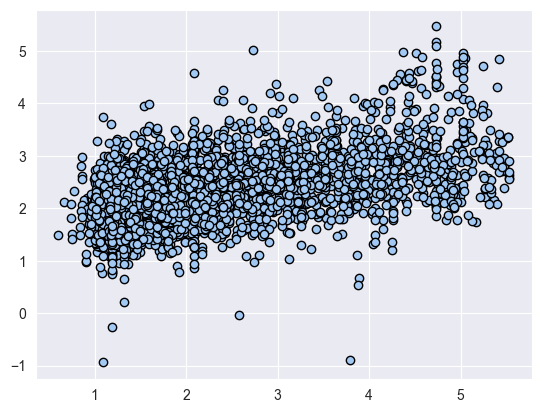

In [145]:
plt.scatter(y_test,pred_poly,edgecolors='black',color=indigo)

<Axes: xlabel='% Silica Concentrate'>

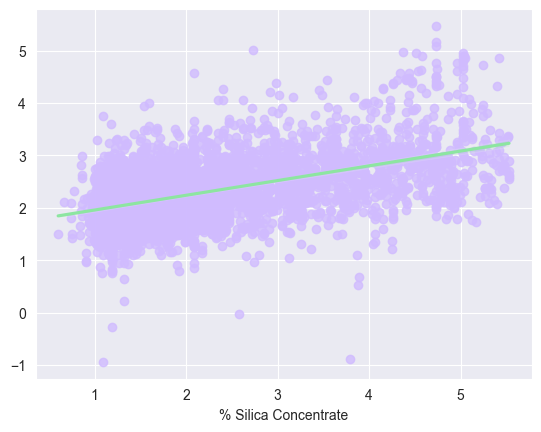

In [146]:
sns.regplot(x=y_test,y=pred_poly,scatter_kws={"color": purple}, line_kws={"color": green})

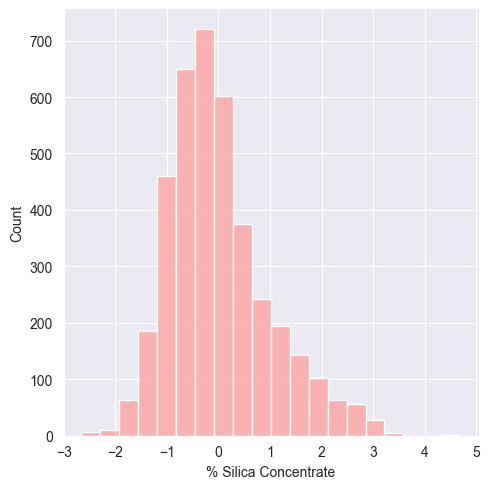

In [147]:
sns.displot(y_test - pred_poly,bins=20,color=red)

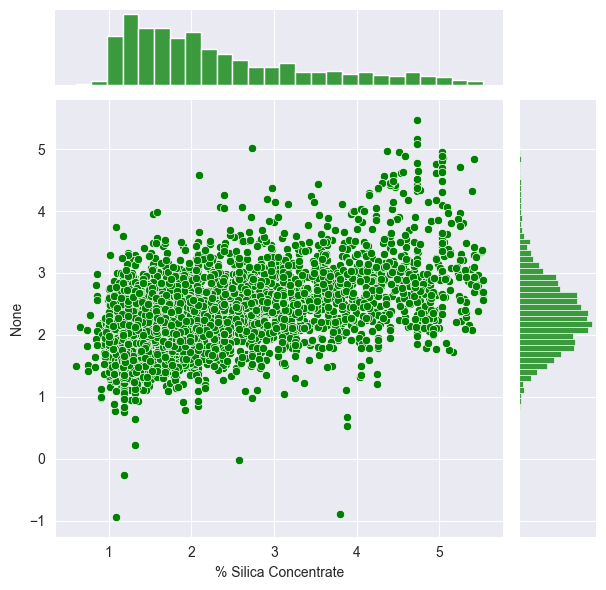

In [148]:
sns.jointplot(x=y_test,y=pred_poly,color='green')

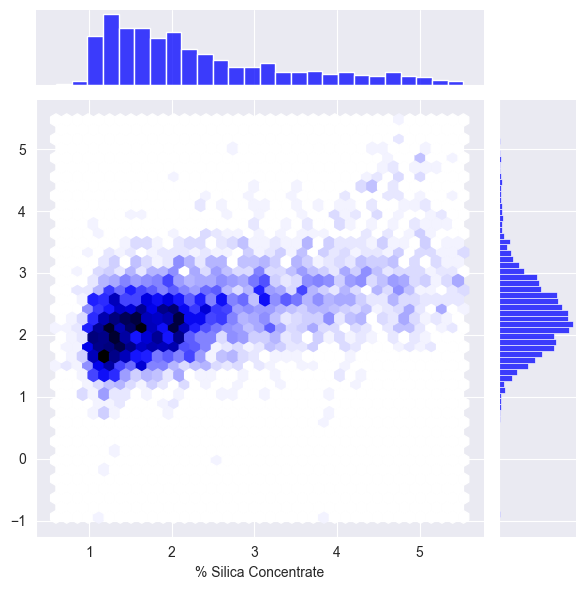

In [149]:
sns.jointplot(x=y_test,y=pred_poly,color='blue',kind='hex')

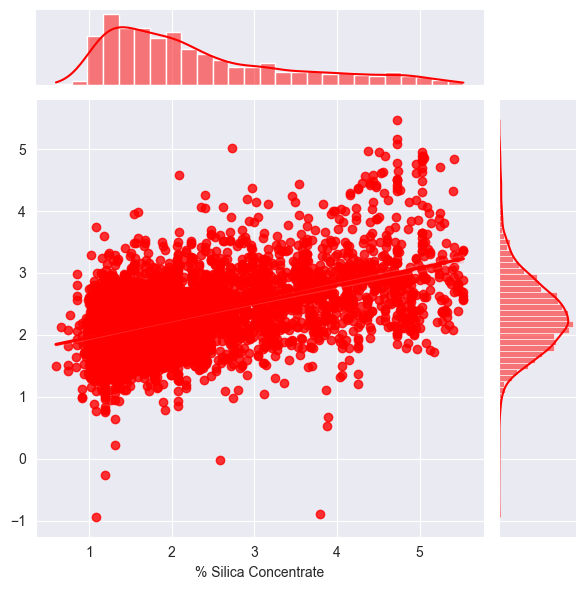

In [150]:
sns.jointplot(x=y_test,y=pred_poly,color='red',kind='reg')

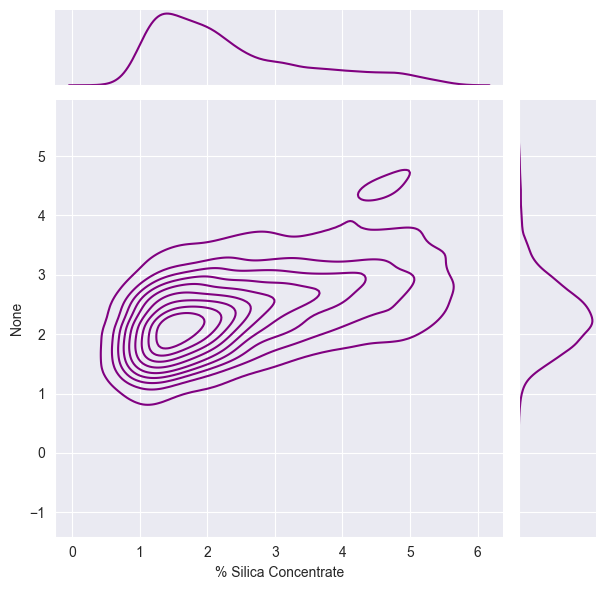

In [151]:
sns.jointplot(x=y_test,y=pred_poly,color='purple',kind='kde')

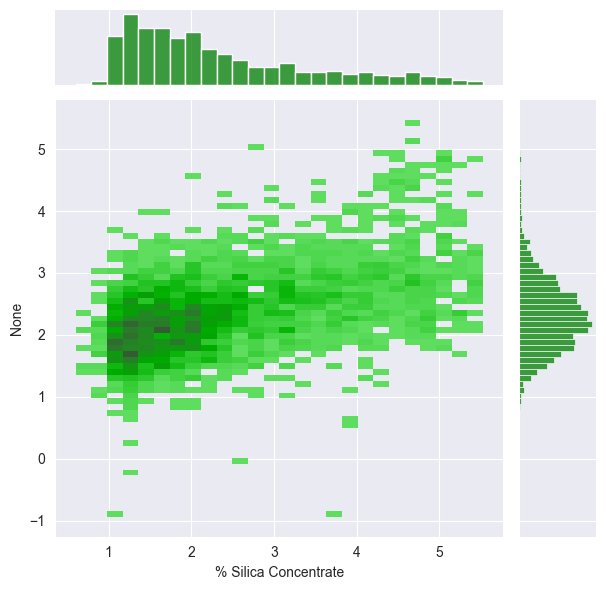

In [152]:
sns.jointplot(x=y_test,y=pred_poly,color='green',kind='hist')

In [153]:
print("Mean Absolute Error = " , mae(y_test,pred_poly))
print("Mean Squared Error = " , mse(y_test,pred_poly))
print("Root Mean Squared Error = " , np.sqrt(mse(y_test,pred_poly)))
print("R2 Score  = ", model.score(x_test_poly,y_test))

Mean Absolute Error =  0.7498978067165932
Mean Squared Error =  0.9406737778911871
Root Mean Squared Error =  0.9698833836555749
R2 Score  =  0.2577932897997489


In [154]:
predictions.append(pred_poly)
rmse.append(np.sqrt(mse(y_test,pred_poly)))
mae_list.append(mae(y_test,pred_poly))
mse_list.append(mse(y_test,pred_poly))

#### Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
model = DecisionTreeRegressor()

In [38]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
pred_dtree = model.predict(X_test)

In [40]:
print("R2 Score of Decision Tree Regressor = ",model.score(X_test,y_test))

R2 Score of Decision Tree Regressor =  0.016594326201040177


In [41]:
r2_list.append(model.score(X_test,y_test))

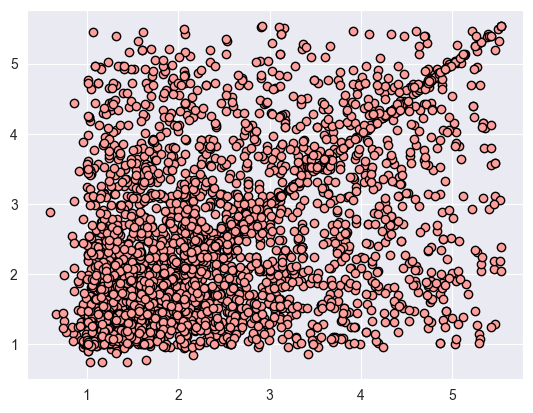

In [159]:
plt.scatter(y_test,pred_dtree,edgecolors='black',color=red)

<Axes: xlabel='% Silica Concentrate'>

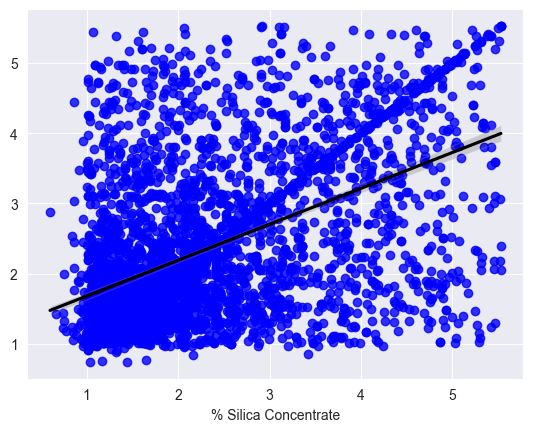

In [160]:
sns.regplot(x=y_test,y=pred_dtree,scatter_kws={"color": 'blue'}, line_kws={"color": 'black'})

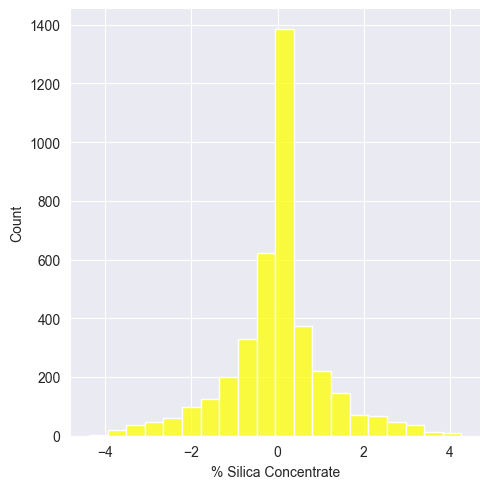

In [161]:
sns.displot(y_test - pred_dtree,bins=20,color='yellow')

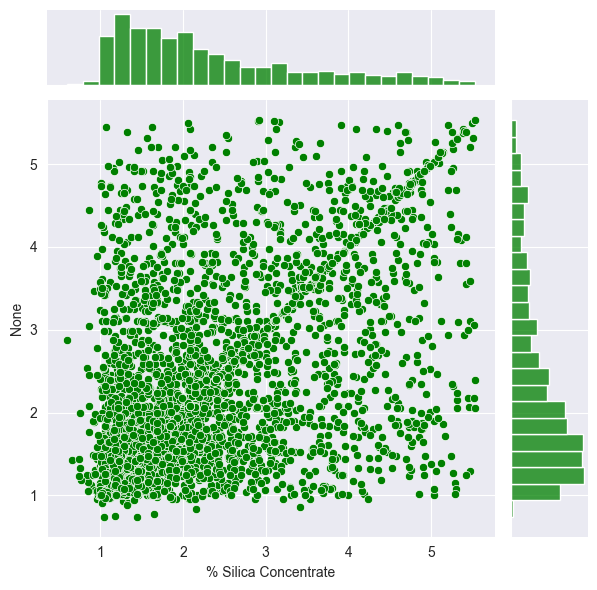

In [164]:
sns.jointplot(x=y_test,y=pred_dtree,color='green')

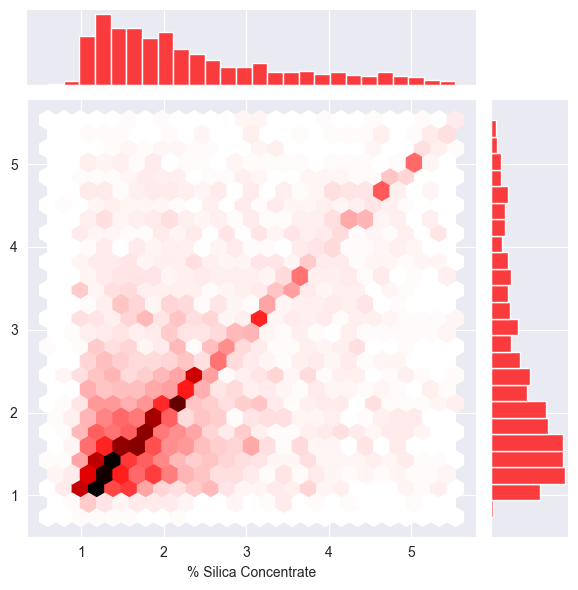

In [165]:
sns.jointplot(x=y_test,y=pred_dtree,color='red',kind='hex')

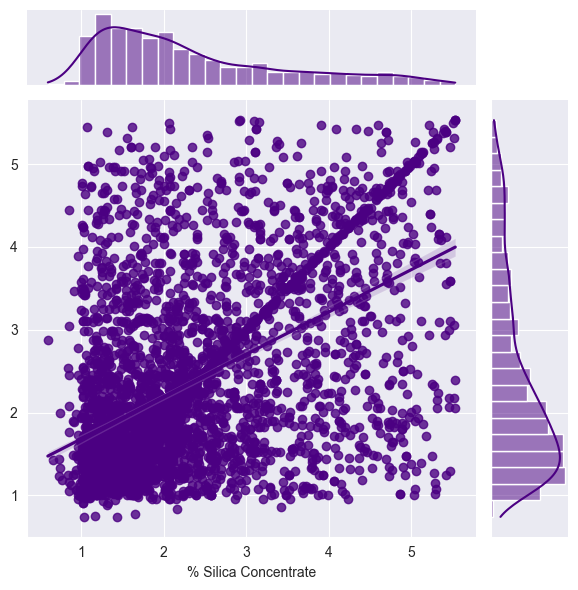

In [166]:
sns.jointplot(x=y_test,y=pred_dtree,color='indigo',kind='reg')

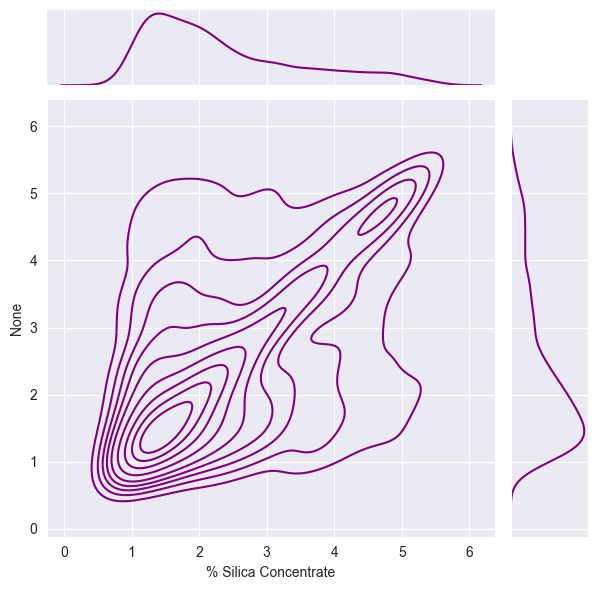

In [167]:
sns.jointplot(x=y_test,y=pred_dtree,color='purple',kind='kde')

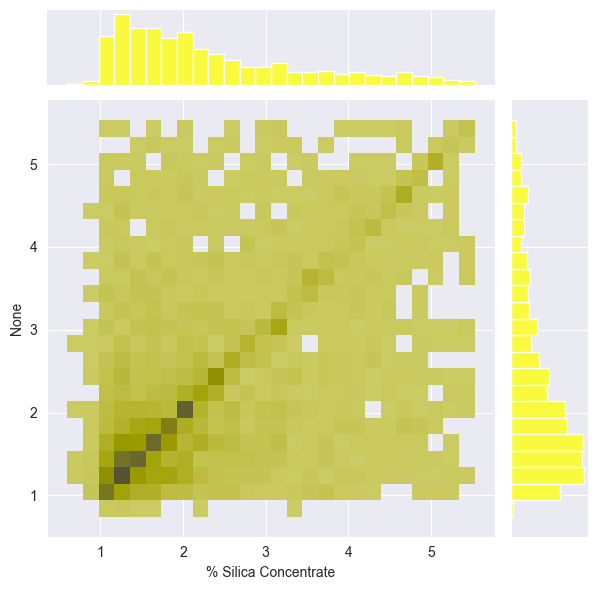

In [163]:
sns.jointplot(x=y_test,y=pred_dtree,color='yellow',kind='hist')

In [98]:
print("Mean Absolute Error = " , mae(y_test,pred_dtree))
print("Mean Squared Error = " , mse(y_test,pred_dtree))
print("Root Mean Squared Error = " , np.sqrt(mse(y_test,pred_dtree)))

Mean Absolute Error =  0.721562905593214
Mean Squared Error =  1.2534856286421776
Root Mean Squared Error =  1.119591724086141


In [168]:
predictions.append(pred_dtree)
rmse.append(np.sqrt(mse(y_test,pred_dtree)))
mae_list.append(mae(y_test,pred_dtree))
mse_list.append(mse(y_test,pred_dtree))

### Performance Evaluation of Models

##### Linear Regression Predictions vs Labeled Values

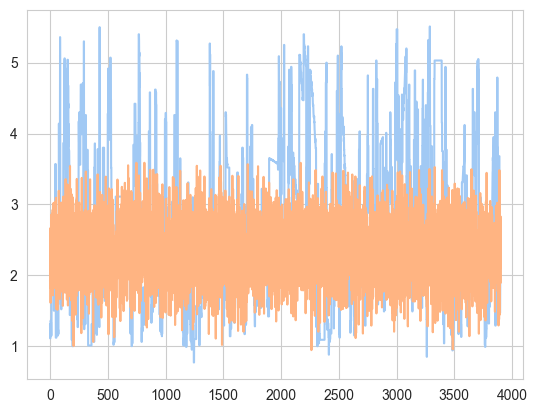

In [100]:
plt.plot(df['% Silica Concentrate'].iloc[:int(len(df) * 0.33)])
plt.plot(pred_linear)

##### Random Forest Regression Predictions vs Labeled Values

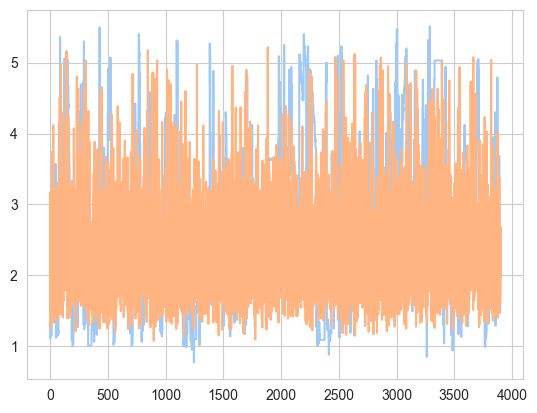

In [101]:
plt.plot(df['% Silica Concentrate'].iloc[:int(len(df) * 0.33)])
plt.plot(pred_rf)

##### K Nearest Neighbours Regression Predictions vs Labeled Values

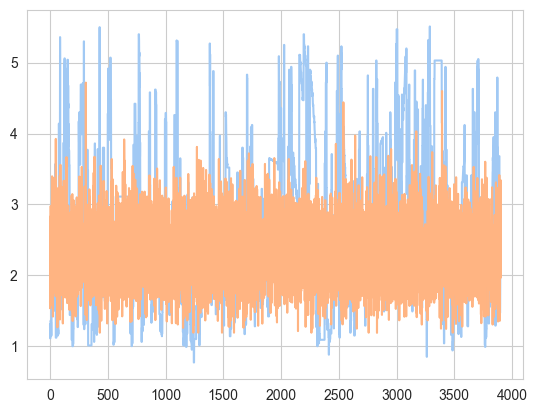

In [102]:
plt.plot(df['% Silica Concentrate'].iloc[:int(len(df) * 0.33)])
plt.plot(pred_knn)

##### Support Vector Regression Predictions vs Labeled Values

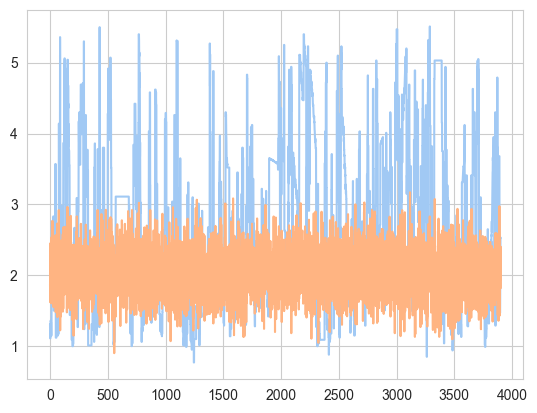

In [103]:
plt.plot(df['% Silica Concentrate'].iloc[:int(len(df) * 0.33)])
plt.plot(pred_svr)

##### Polynomial Regression Predictions vs Labeled Values

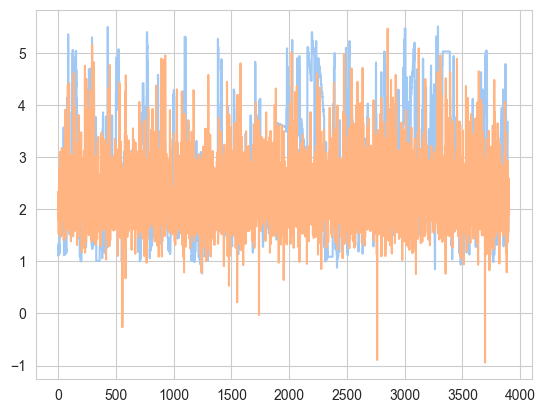

In [104]:
plt.plot(df['% Silica Concentrate'].iloc[:int(len(df) * 0.33)])
plt.plot(pred_poly)

##### Decision Tree Regression Predictions vs Labeled Values

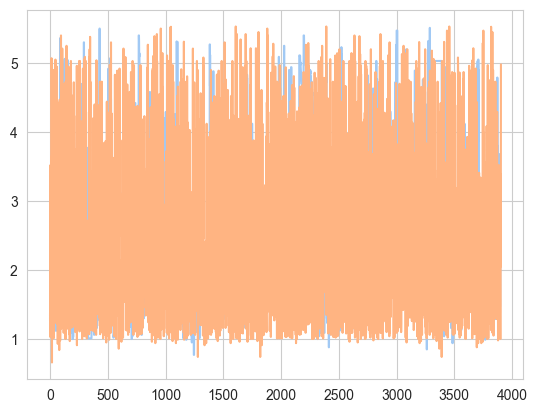

In [106]:
plt.plot(df['% Silica Concentrate'].iloc[:int(len(df) * 0.33)])
plt.plot(pred_dtree)

##### Root Mean Square Errors of Models

C:\Users\Prabhav - Laptop HP\AppData\Local\Temp\ipykernel_11920\1009704290.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(rmse,palette='bright')


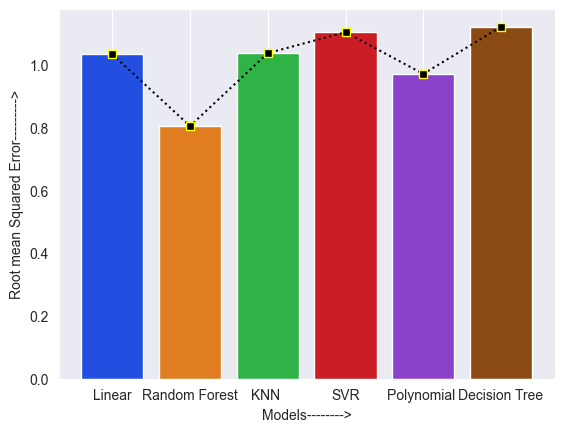

In [169]:
sns.barplot(rmse,palette='bright')
plt.plot(rmse,marker='s',markeredgecolor="yellow",linestyle=':',color='black')
plt.xticks(range(len(rmse)), models_name)
plt.xlabel("Models-------->")
plt.ylabel("Root mean Squared Error--------->")
plt.grid()

#####  Mean Absolute Errors of Models

C:\Users\Prabhav - Laptop HP\AppData\Local\Temp\ipykernel_11920\3445530608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(mae_list,palette='bright')


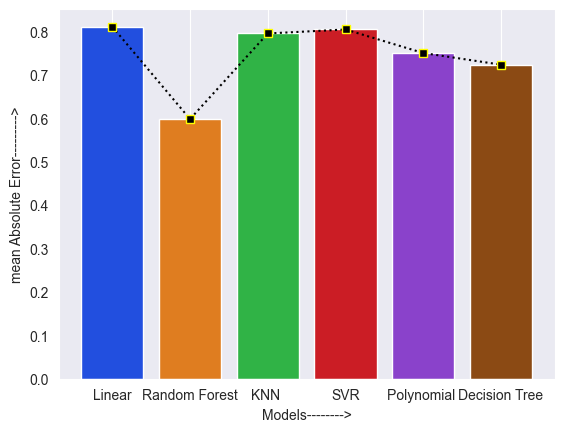

In [173]:
sns.barplot(mae_list,palette='bright')
plt.plot(mae_list,marker='s',markeredgecolor="yellow",linestyle=':',color='black')
plt.xticks(range(len(mae_list)), models_name)
plt.xlabel("Models-------->")
plt.ylabel("mean Absolute Error--------->")
plt.grid()

#####  Mean Squared Errors of Models

C:\Users\Prabhav - Laptop HP\AppData\Local\Temp\ipykernel_11920\1592279104.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(mse_list,palette='bright')


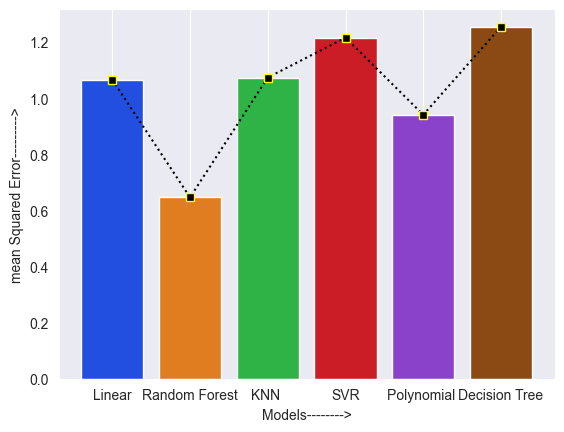

In [174]:
sns.barplot(mse_list,palette='bright')
plt.plot(mse_list,marker='s',markeredgecolor="yellow",linestyle=':',color='black')
plt.xticks(range(len(mse_list)), models_name)
plt.xlabel("Models-------->")
plt.ylabel("mean Squared Error--------->")
plt.grid()

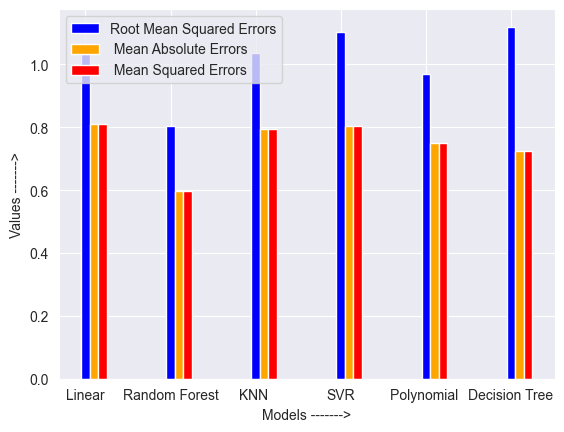

In [178]:
data1 = rmse
data2 = mae_list
data3 = mse_list
x_values = range(len(data1))

plt.bar(x_values, data1, width=0.1, align='center', label='Root Mean Squared Errors', color='blue')
plt.bar([x + 0.1 for x in x_values], data2, width=0.1, align='center', label=' Mean Absolute Errors', color='orange')
plt.bar([x + 0.2 for x in x_values], data2, width=0.1, align='center', label=' Mean Squared Errors', color='red')
plt.xlabel('Models ------->')
plt.ylabel('Values ------->')
plt.xticks(range(len(mse_list)), models_name)
plt.legend()

##### R2 Score of Training Data

In [107]:
print("R2 Score = ", model.score(X_train,y_train))

R2 Score =  0.159005309378504


##### R2 Score of Testing Data

In [108]:
print("R2 Score = ", model.score(X_test,y_test))

R2 Score =  0.15929863528168586


C:\Users\Prabhav - Laptop HP\AppData\Local\Temp\ipykernel_3448\819290548.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(r2_list,palette='bright')


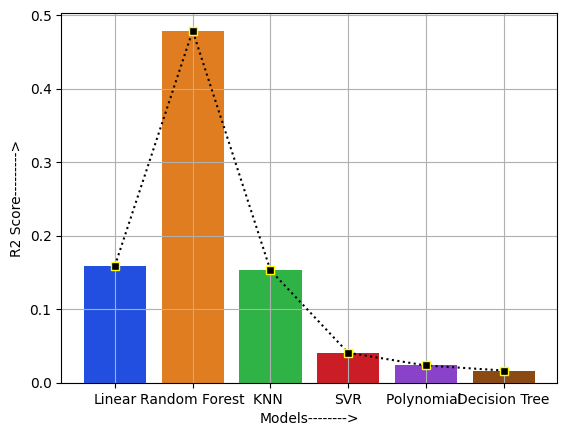

In [46]:
sns.barplot(r2_list,palette='bright')
plt.plot(r2_list,marker='s',markeredgecolor="yellow",linestyle=':',color='black')
plt.xticks(range(len(r2_list)), models_name)
plt.xlabel("Models-------->")
plt.ylabel("R2 Score--------->")
plt.grid()

<h1 style='text-align: center;'> THANK YOU !!!! </h1>